In [7]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import joblib

In [8]:
contractions = {"aight": "alright",
"ain't": "am not",
"amn't": "am not",
"aren't": "are not",
"can't": "cannot",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"daren't": "dared not",
"daresn't": "dare not",
"dasn't": "dare not",
"didn't":"did not",
"doesn't":"does not",
"don't": "do not",
"dunno": "do not know",
"d'ye": "do you",
"e'er":"ever",
"'em": "them",
"everybody's":"everybody is",
"everyone's": "everyone is",
"finna": "going to",
"g'day": "good day",
"gimme":"give me",
"giv'n": "given",
"gonna": "going to",
"gon't": "go not",
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't": "has not",
"haven't":"have not",
"he'd": "he would",
"he'll": "he will", 
"he's": "he is",
"here's": "here is",
"he've":"he have",
"how'd": "how did", 
"howdy": "how do you do",
"how'll": "how will",
"how're": "how are",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'm": "I am",
"I'm'a": "I am about to",
"I'm'o": "I am going to",
"innit": "is it not",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"iunno": "I don't know",
"kinda": "kind of",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"may've": "may have",
"methinks": "me thinks",
"mightn't": "might not",
"might've": "might have",
"mustn't": "must not",
"mustn't've": "must not have",
"must've": "must have",
"needn't":"need not",
"nal" : "and all",
"ne'er": "never",
"o'clock": "of the clock",
"o'er": "over",
"ol'": "old",
"oughtn't": "ought not",
"shan't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't" :"should not",
"shouldn't've": "should not have",
"somebody's":"somebody is",
"someone's": "someone is",
"something's": "something is",
"so're":"so are",
"that'll":"that will",
"that're": "that are",
"that's": "that is",
"that'd": "that would",
"there'd": "there would",
"there'll":"there will",
"there're": "there are",
"there's": "there has",
"these're": "these are",
"these've": "these have",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"this's": "this is",
"those're": "those are",
"those've": "those have",
"'tis": "it is",
"to've": "to have",
"'twas": "it was",
"wanna": "want to",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we're": "we are",
"we've": "we have", 
"weren't": "were not", 
"what'd": "what did",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"where'd": "where did",
"where'll": "where will",
"where're": "where are",
"where's": "where is",
"where've": "where have",
"which'd": "which would",
"which'll": "which will",
"which're": "which are",
"which's": "which is",
"which've": "which have",
"who'd": "who would",
"who'd've": "who would have",
"who'll": "who will",
"who're": "who are",
"who's": "who is",
"who've": "who have",
"why'd": "why did",
"why're": "why are",
"why's": "why is",
"willn't": "will not",
"won't": "will not",
"wonnot": "will not",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd've": "you all would have",
"y'all'd'n've": "you all would not have",
"y'all're": "you all are",
"y'at": "you at",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"you've": "you have"
               }

In [9]:
def cal_hm_acc(class_report):
    labels = df['lyrics sentiment'].value_counts().index.tolist()
    sum_recall = 0
    for x in labels: 
        sum_recall += 1/class_report[x]['recall']
    harmonic_mean_acc = 1/((1/len(labels))*(sum_recall))
    return harmonic_mean_acc

In [10]:
df = pd.read_csv('MoodyLyrics-1865-Sentiment-Audio.csv', index_col=0, encoding="utf-8")
df.head(5)

,artist,title,lyrics sentiment,mood,lyrics,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
index,,,,,,,,,,,,,,,,,
ML1,George Michael,I Want Your Sex,pos,happy,In the past there were arguments for and again...,6QnFHieoch6U9J8zfv6hml,0.812,0.600,10,-13.418,0,0.0538,0.005090,0.02480,0.0465,0.800,99.189
ML2,Rob Zombie,Pussy Liquor,neg,angry,Baby :\nGimme a B\nGimme a A\nGimme a B\nGimme...,03VzAAMs5PrLM42XR7ijuc,0.540,0.923,10,-3.965,1,0.0324,0.000347,0.00614,0.4840,0.531,112.936
ML3,Katatonia,12,neg,sad,Black theatre of love\nViolet dancers cast the...,4GCOPgFknQSHVXuAAdQYjk,0.134,0.674,6,-8.428,1,0.0478,0.000460,0.70300,0.2040,0.162,69.289
ML4,Bing Crosby,Swinging On A Star,pos,happy,Would you like to swing on a star\nCarry moonb...,7xy0PAZxzGDOcYzyptvprd,0.706,0.167,0,-13.137,1,0.0602,0.896000,0.00000,0.1010,0.724,139.763
ML5,Ludacris,Get Back,neg,angry,"Heads up! (woop, woop) Heads up! (woop, woop)\...",6o3MvjWfF0jczTzPRcfZsK,0.562,0.638,1,-5.141,1,0.2750,0.055900,0.00000,0.1270,0.165,171.758


In [11]:
df[["title", "artist", "lyrics sentiment"]]

,title,artist,lyrics sentiment
index,,,
ML1,I Want Your Sex,George Michael,pos
ML2,Pussy Liquor,Rob Zombie,neg
ML3,12,Katatonia,neg
ML4,Swinging On A Star,Bing Crosby,pos
ML5,Get Back,Ludacris,neg
...,...,...,...
ML1996,If It Means a Lot to You,A Day To Remember,neg
ML1997,"Beautiful, Loved and Blessed",Prince,pos
ML1998,The Game,Deine Lakaien,neg


In [12]:
def clean_lyrics(lyrics):
    # Replace next line characters with spaces
    lemmatizer = WordNetLemmatizer()
    lyrics = lyrics.replace("\\n", " ")
    lyrics = lyrics.replace("’", "'")
    #print("Changed next line to space:\n",lyrics, "\n")
    # Remove section headers in brackets - will include adlibs and background vocals
    lyrics = re.sub("[\(\[].*?[\)\]]", "", lyrics)
    #print("Removed section headers in brackets:\n", lyrics, "\n")
    # Remove section headers and terms not in brackets - repeat x2 or repeat 2x or repeat 2
    headers = ["Verse", "Chorus", "Repeat", "Solo", "Bridge", "Interlude", "Instrumental"]
    for header in headers:
        lyrics = re.sub(r'(?:\b'+header+r'\b\s\dx|\b'+header+r'\b\sx\d|\b'+header+r'\b\s\d|\b'+header+r'\b\s\d\:)', "", lyrics, flags=re.IGNORECASE)
        lyrics = re.sub(r'\s+?(?:\b'+header+r'\b)\s*?', "", lyrics)
    
    # Expand contractions
    word_list = lyrics.split()
    for i in range(0, len(word_list)):
        word = word_list[i].lower()
        if word in contractions.keys():
            word_list[i] = contractions[word]
            
    lyrics = ' '.join(word_list)
    
    # Remove remaining numbers
    lyrics = re.sub(r'\d+', " ", lyrics)
    
    # Remove punctuations
    punctuations = '''-;:?'"\,<>./@#$%^&*_~'''
    
    for punc in punctuations:
        lyrics = lyrics.replace(punc, " ")
        
    lem_lyrics = []
    list_lyrics = lyrics.split()
    for i in range(len(list_lyrics)):
        word = list_lyrics[i].lower()
        if not (len(word) == 1 and word not in ['i', 'a']):
            word = lemmatizer.lemmatize(word)
            lem_lyrics.append(word)
    
    # Remove any double spaces
    lyrics = ' '.join(lem_lyrics)
    
    return lyrics

df['lyrics'] = df['lyrics'].apply(clean_lyrics)

df['lyrics'].head(3)


index
ML1    in the past there were argument for and agains...
ML2    baby give me a give me a a give me a give me a...
ML3    black theatre of love violet dancer cast their...
Name: lyrics, dtype: object

In [13]:
targetLabels = np.asarray(df['lyrics sentiment'], dtype="str")
targetLabels[:4]

array(['pos', 'neg', 'neg', 'pos'], dtype='<U3')

#### Split dataset into 80:20 split of train and test

In [14]:
lyrics = np.asarray(df['lyrics'], dtype="str")
instances_train, instances_test, target_train, target_test = train_test_split(lyrics, targetLabels, test_size=0.2, random_state=0)

### Bernouilli Naive Bayes

In [16]:
vectorizer = TfidfVectorizer(max_df=0.5, max_features=5000)
#vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(use_idf=False)
X_train = vectorizer.fit_transform(instances_train)
X_test = vectorizer.transform(instances_test)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (1492, 5000) Test: (373, 5000)


In [17]:
bnb_model = BernoulliNB()
scores = cross_val_score(bnb_model, X_train, target_train, cv=10)
print("Score by fold: " + str(scores))
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score by fold: [0.74       0.73333333 0.73825503 0.73154362 0.73154362 0.73154362
 0.66442953 0.73154362 0.65100671 0.69798658]
Accuracy: 0.7151 (+/- 0.06)


Accuracy = 0.7292225201072386
Confusion Matrix:


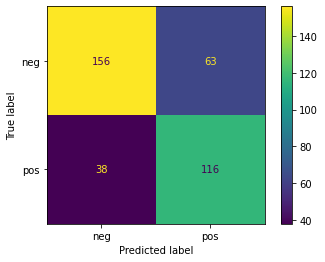

ROC Curve:


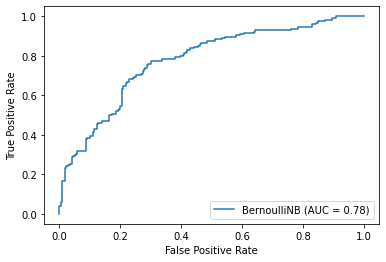

PR Curve:


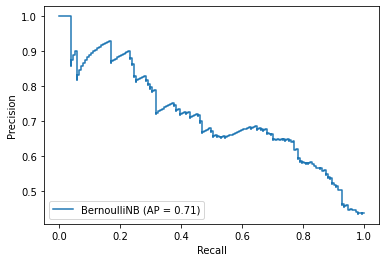

              precision    recall  f1-score   support

         neg       0.80      0.71      0.76       219
         pos       0.65      0.75      0.70       154

    accuracy                           0.73       373
   macro avg       0.73      0.73      0.73       373
weighted avg       0.74      0.73      0.73       373



In [18]:
bnb_model.fit(X_train, target_train)
predictions = bnb_model.predict(X_test)
print("Accuracy = " + str(accuracy_score(target_test, predictions, normalize=True)))
#Output the confusion matrix on the test set
print("Confusion Matrix:")
plot_confusion_matrix(bnb_model, X_test, target_test) 
plt.show()
print("ROC Curve:")
plot_roc_curve(bnb_model, X_test, target_test)
plt.show()
print("PR Curve:")
plot_precision_recall_curve(bnb_model, X_test, target_test)
plt.show()
print(classification_report(target_test, predictions))

In [19]:
cal_hm_acc(classification_report(target_test, predictions, output_dict=True))

0.7322165574168487

### Multinomial Naive Bayes

In [20]:
vectorizer = TfidfVectorizer(max_df=0.8, max_features=2000, min_df= 7)
#vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(use_idf=False)
X_train = vectorizer.fit_transform(instances_train)
X_test = vectorizer.transform(instances_test)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (1492, 2000) Test: (373, 2000)


In [21]:
mnb_model = MultinomialNB()
scores = cross_val_score(mnb_model, X_train, target_train, cv=10)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.7084 (+/- 0.04)


Accuracy = 0.739946380697051
Confusion Matrix:


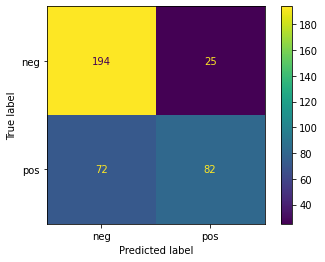

ROC Curve:


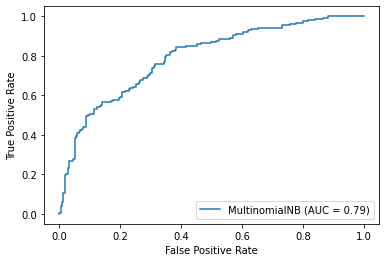

PR Curve:


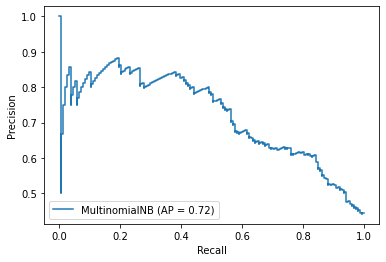

              precision    recall  f1-score   support

         neg       0.73      0.89      0.80       219
         pos       0.77      0.53      0.63       154

    accuracy                           0.74       373
   macro avg       0.75      0.71      0.71       373
weighted avg       0.74      0.74      0.73       373



In [22]:
mnb_model.fit(X_train, target_train)
predictions = mnb_model.predict(X_test)
print("Accuracy = " + str(accuracy_score(target_test, predictions, normalize=True)))
print("Confusion Matrix:")
plot_confusion_matrix(mnb_model, X_test, target_test) 
plt.show()
print("ROC Curve:")
plot_roc_curve(mnb_model, X_test, target_test)
plt.show()
print("PR Curve:")
plot_precision_recall_curve(mnb_model, X_test, target_test)
plt.show()
print(classification_report(target_test, predictions))

In [23]:
cal_hm_acc(classification_report(target_test, predictions, output_dict=True))

0.6651335869883346

### Complement Naive Bayes

In [24]:
vectorizer = TfidfVectorizer(max_df=0.5, max_features=2000, min_df=5, ngram_range=(1, 2))
#vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(use_idf=False)
X_train = vectorizer.fit_transform(instances_train)
X_test = vectorizer.transform(instances_test)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (1492, 2000) Test: (373, 2000)


In [25]:
cnb_model = ComplementNB()
scores = cross_val_score(cnb_model, X_train, target_train, cv=10)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.7346 (+/- 0.04)


Accuracy = 0.7184986595174263
Confusion Matrix:


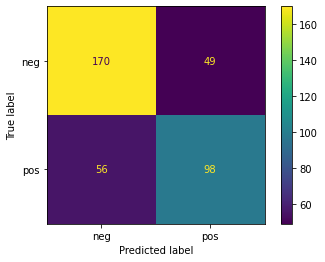

ROC Curve:


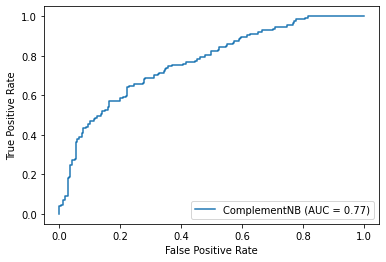

PR Curve:


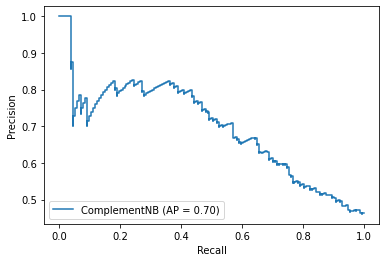

              precision    recall  f1-score   support

         neg       0.75      0.78      0.76       219
         pos       0.67      0.64      0.65       154

    accuracy                           0.72       373
   macro avg       0.71      0.71      0.71       373
weighted avg       0.72      0.72      0.72       373



In [26]:
cnb_model.fit(X_train, target_train)
predictions = cnb_model.predict(X_test)
print("Accuracy = " + str(accuracy_score(target_test, predictions, normalize=True)))
print("Confusion Matrix:")
plot_confusion_matrix(cnb_model, X_test, target_test) 
plt.show()
print("ROC Curve:")
plot_roc_curve(cnb_model, X_test, target_test)
plt.show()
print("PR Curve:")
plot_precision_recall_curve(cnb_model, X_test, target_test)
plt.show()
print(classification_report(target_test, predictions))

In [27]:
cal_hm_acc(classification_report(target_test, predictions, output_dict=True))

0.6993828974434323

### SVM

In [149]:
vectorizer = TfidfVectorizer(max_df=0.5, max_features=5000)
#vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(use_idf=False)
X_train = vectorizer.fit_transform(instances_train)
X_test = vectorizer.transform(instances_test)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (1492, 5000) Test: (373, 5000)


In [150]:
svm_model = SVC(kernel='linear', class_weight='balanced')
#svm_model = SVC(class_weight='balanced')
scores = cross_val_score(svm_model, X_train, target_train, cv=10)
print("Score by fold: " + str(scores))
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score by fold: [0.69333333 0.68       0.74496644 0.74496644 0.69798658 0.73154362
 0.73154362 0.70469799 0.67785235 0.69127517]
Accuracy: 0.7098 (+/- 0.05)


Accuracy = 0.6916890080428955
Confusion Matrix:


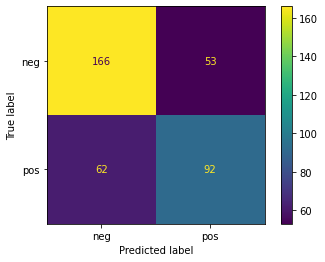

ROC Curve:


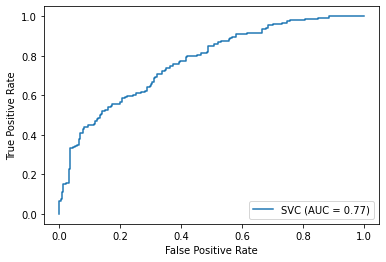

PR Curve:


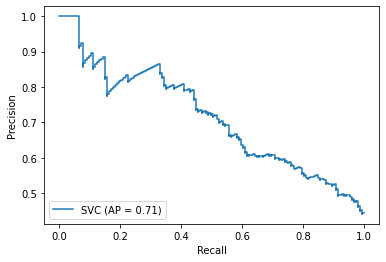

              precision    recall  f1-score   support

         neg       0.73      0.76      0.74       219
         pos       0.63      0.60      0.62       154

    accuracy                           0.69       373
   macro avg       0.68      0.68      0.68       373
weighted avg       0.69      0.69      0.69       373



In [151]:
svm_model.fit(X_train, target_train)
predictions = svm_model.predict(X_test)
print("Accuracy = " + str(accuracy_score(target_test, predictions, normalize=True)))
#Output the confusion matrix on the test set
print("Confusion Matrix:")
confusionMatrix = confusion_matrix(target_test, predictions)
plot_confusion_matrix(svm_model, X_test, target_test) 
plt.show()
print("ROC Curve:")
plot_roc_curve(svm_model, X_test, target_test)
plt.show()
print("PR Curve:")
plot_precision_recall_curve(svm_model, X_test, target_test)
plt.show()
print(classification_report(target_test, predictions))

In [152]:
cal_hm_acc(classification_report(target_test, predictions, output_dict=True))

0.6681834091704585

### SVM with Gradient Descent

In [20]:
sgd_model = SGDClassifier()
scores = cross_val_score(sgd_model, X_train, target_train, cv=10)
print("Score by fold: " + str(scores))
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score by fold: [0.63333333 0.64666667 0.73154362 0.72483221 0.69127517 0.65100671
 0.66442953 0.70469799 0.69798658 0.67114094]
Accuracy: 0.6817 (+/- 0.06)


Accuracy = 0.6621983914209115
Confusion Matrix:


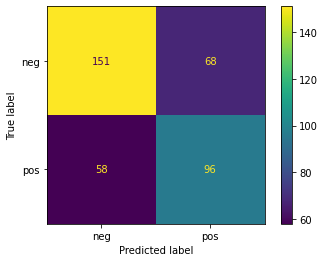

ROC Curve:


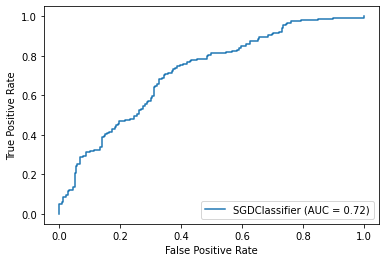

              precision    recall  f1-score   support

         neg       0.72      0.69      0.71       219
         pos       0.59      0.62      0.60       154

    accuracy                           0.66       373
   macro avg       0.65      0.66      0.65       373
weighted avg       0.67      0.66      0.66       373



In [142]:
sgd_model.fit(X_train, target_train)
predictions = sgd_model.predict(X_test)
print("Accuracy = " + str(accuracy_score(target_test, predictions, normalize=True)))
#Output the confusion matrix on the test set
print("Confusion Matrix:")
confusionMatrix = confusion_matrix(target_test, predictions)
plot_confusion_matrix(sgd_model, X_test, target_test) 
plt.show()
print("ROC Curve:")
plot_roc_curve(sgd_model, X_test, target_test)
plt.show()
print(classification_report(target_test, predictions))

In [22]:
cal_hm_acc(classification_report(target_test, predictions, output_dict=True))

0.7167938457720703

### Logistic Regression

In [28]:
vectorizer = TfidfVectorizer(max_df=0.7, max_features=8000, min_df=5, ngram_range=(1, 2), stop_words=None)
#vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(use_idf=False)
X_train = vectorizer.fit_transform(instances_train)
X_test = vectorizer.transform(instances_test)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (1492, 8000) Test: (373, 8000)


In [29]:
log_model = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2')
scores = cross_val_score(log_model, X_train, target_train, cv=10)
print("Score by fold: " + str(scores))
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score by fold: [0.73333333 0.75333333 0.72483221 0.77852349 0.73154362 0.73825503
 0.69798658 0.73825503 0.69798658 0.7114094 ]
Accuracy: 0.7305 (+/- 0.05)


Accuracy = 0.6916890080428955
Confusion Matrix:


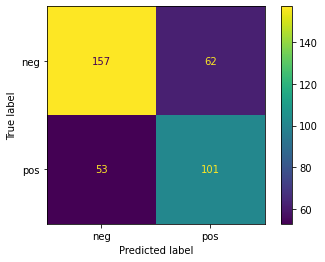

ROC Curve:


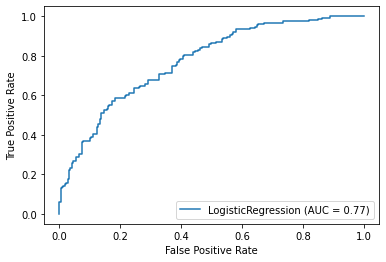

PR Curve:


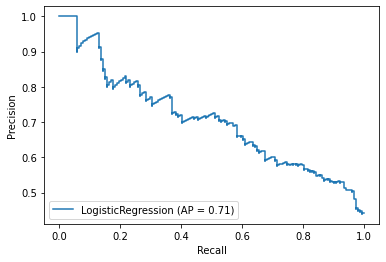

              precision    recall  f1-score   support

         neg       0.75      0.72      0.73       219
         pos       0.62      0.66      0.64       154

    accuracy                           0.69       373
   macro avg       0.68      0.69      0.68       373
weighted avg       0.69      0.69      0.69       373



In [30]:
log_model.fit(X_train, target_train)
predictions = log_model.predict(X_test)
print("Accuracy = " + str(accuracy_score(target_test, predictions, normalize=True)))
#Output the confusion matrix on the test set
print("Confusion Matrix:")
confusionMatrix = confusion_matrix(target_test, predictions)
plot_confusion_matrix(log_model, X_test, target_test) 
plt.show()
print("ROC Curve:")
plot_roc_curve(log_model, X_test, target_test)
plt.show()
print("PR Curve:")
plot_precision_recall_curve(log_model, X_test, target_test)
plt.show()
print(classification_report(target_test, predictions))

In [31]:
cal_hm_acc(classification_report(target_test, predictions, output_dict=True))

0.6850119878177852

### Pipeline - Multinomial NB, Bernoulli NB, Complement NB, Logistic Regression, SVM

In [8]:
lyrics = np.asarray(df['lyrics'], dtype="str")

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(lyrics, targetLabels, test_size=0.2, random_state=0)

### MNB

In [10]:
senti_clf = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.8, max_features=2000, min_df=7, ngram_range=(1,1))),
    ('model', MultinomialNB()),
])

senti_clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.8, max_features=2000, min_df=7)),
                ('model', MultinomialNB())])

### BNB

In [10]:
senti_clf = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.5, max_features=5000)),
    ('model', BernoulliNB()),
])

senti_clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.5, max_features=5000)),
                ('model', BernoulliNB())])

In [14]:
joblib.dump(senti_clf, 'moodify_models\\senti_bnb_pipeline.joblib')

['moodify_models\\senti_bnb_pipeline.joblib']

In [15]:
senti_pip = joblib.load('moodify_models\\senti_bnb_pipeline.joblib')

In [18]:
senti_pip.predict([X_test[0]])

array(['neg'], dtype='<U3')

In [19]:
Y_test[0]

'neg'

### Complement NB

In [29]:
senti_clf = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.5, max_features=2000, min_df=5, ngram_range=(1, 2))),
    ('model', ComplementNB())
])

senti_clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.5, max_features=2000, min_df=5,
                                 ngram_range=(1, 2))),
                ('model', ComplementNB())])

### LR

In [33]:
senti_clf = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.7, max_features=8000, min_df=5,
                                 ngram_range=(1, 2))),
    ('model', LogisticRegression(class_weight='balanced',
                                    solver='liblinear')),
])

senti_clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.7, max_features=8000, min_df=5,
                                 ngram_range=(1, 2))),
                ('model',
                 LogisticRegression(class_weight='balanced',
                                    solver='liblinear'))])

### SVM

In [37]:
# GridSearch returned with rbf but linear is better
senti_clf = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.5, max_features=5000)),
    ('model', SVC(kernel='linear', class_weight='balanced')),
])

senti_clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.5, max_features=5000)),
                ('model', SVC(class_weight='balanced', kernel='linear'))])

In [38]:
scores = cross_val_score(senti_clf, X_train, Y_train, cv=10)
print("Score by fold: " + str(scores))
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score by fold: [0.71333333 0.72       0.71812081 0.72483221 0.72483221 0.72483221
 0.71812081 0.7114094  0.7114094  0.73154362]
Accuracy: 0.7198 (+/- 0.01)


Accuracy = 0.6836461126005362
Confusion Matrix:


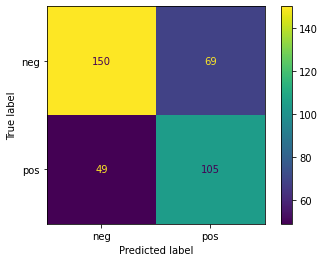

ROC Curve:


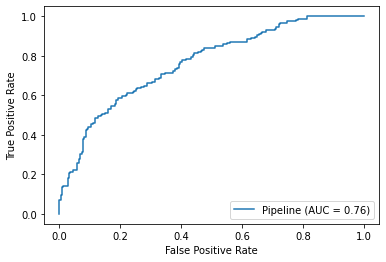

PR Curve:


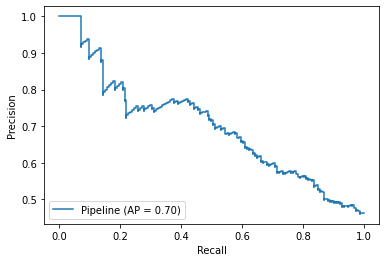

              precision    recall  f1-score   support

         neg       0.75      0.68      0.72       219
         pos       0.60      0.68      0.64       154

    accuracy                           0.68       373
   macro avg       0.68      0.68      0.68       373
weighted avg       0.69      0.68      0.69       373



In [39]:
predictions = senti_clf.predict(X_test)
print("Accuracy = " + str(accuracy_score(Y_test, predictions, normalize=True)))
print("Confusion Matrix:")
plot_confusion_matrix(senti_clf, X_test, Y_test) 
plt.show()
print("ROC Curve:")
plot_roc_curve(senti_clf, X_test, Y_test)
plt.show()
print("PR Curve:")
plot_precision_recall_curve(senti_clf, X_test, Y_test)
plt.show()
print(classification_report(Y_test, predictions))

In [40]:
report = classification_report(Y_test, predictions, output_dict=True)

harmonic_mean_acc = 1/((1/2)*((1/report['neg']['recall']) + (1/report['pos']['recall'])))

harmonic_mean_acc

0.683371298405467

### Randomized Search

In [28]:
params = {
    'vectorizer__max_features': [2000, 5000, 8000, 15000, None],
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'vectorizer__max_df': [0.5, 0.7, 0.8],
    'vectorizer__min_df': [1, 5, 7],
    'vectorizer__use_idf': (True, False),
    'vectorizer__stop_words': (None, 'english'),
    'model__C': [0.001, 0.01, 0.1, 1.0],
    'model__kernel': ('linear', 'rbf'),
    'model__class_weight': ('balanced', None)
}

In [29]:
svc_rs = RandomizedSearchCV(senti_clf, param_distributions = params, cv = 10, verbose=1)

In [30]:
svc_rs.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.7min finished


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                             ('model', SVC(kernel='linear'))]),
                   param_distributions={'model__C': [0.001, 0.01, 0.1, 1.0],
                                        'model__class_weight': ('balanced',
                                                                None),
                                        'model__kernel': ('linear', 'rbf'),
                                        'vectorizer__max_df': [0.5, 0.7, 0.8],
                                        'vectorizer__max_features': [2000, 5000,
                                                                     8000,
                                                                     15000,
                                                                     None],
                                        'vectorizer__min_df': [1, 5, 7],
                                        'vectorizer__n

In [32]:
for param in sorted(params.keys()):
    print("%s: %r" % (param, svc_rs.best_params_[param]))

model__C: 1.0
model__class_weight: None
model__kernel: 'linear'
vectorizer__max_df: 0.7
vectorizer__max_features: 15000
vectorizer__min_df: 5
vectorizer__ngram_range: (1, 1)
vectorizer__stop_words: 'english'
vectorizer__use_idf: True


In [33]:
svc_rs.best_estimator_

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.7, max_features=15000, min_df=5,
                                 stop_words='english')),
                ('model', SVC(kernel='linear'))])

In [35]:
svc_rs.best_score_

0.6890156599552573

### GridSearch

In [53]:
parameters = {
    'vectorizer__max_features': [2000, 5000, 8000, 15000, None],
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'vectorizer__max_df': [0.5, 0.7, 0.8],
    'vectorizer__min_df': [1, 5, 7],
    'vectorizer__use_idf': (True, False),
    'vectorizer__stop_words': (None, 'english'),
}

In [46]:
parameters = {
    'vectorizer__max_features': [2000, 5000, 8000, 15000, None],
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'vectorizer__max_df': [0.5, 0.7, 0.8],
    'vectorizer__min_df': [1, 5, 7],
    'vectorizer__use_idf': (True, False),
    'vectorizer__stop_words': (None, 'english'),
}

In [57]:
grid = GridSearchCV(senti_clf, parameters, cv=2, n_jobs=1, verbose=1)

In [58]:
grid.fit(X_train, Y_train)

Fitting 2 folds for each of 5760 candidates, totalling 11520 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 11520 out of 11520 | elapsed: 253.1min finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1.0],
                         'model__class_weight': ('balanced', None),
                         'model__kernel': ('linear', 'rbf'),
                         'vectorizer__max_df': [0.5, 0.7, 0.8],
                         'vectorizer__max_features': [2000, 5000, 8000, 15000,
                                                      None],
                         'vectorizer__min_df': [1, 5, 7],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)],
                         'vectorizer__stop_words': (None, 'english'),
                         'vectorizer__use_idf': (True, False)},
             verbose=1)

In [59]:
for param in sorted(parameters.keys()):
    print("%s: %r" % (param, grid.best_params_[param]))

model__C: 1.0
model__class_weight: 'balanced'
model__kernel: 'rbf'
vectorizer__max_df: 0.5
vectorizer__max_features: 5000
vectorizer__min_df: 1
vectorizer__ngram_range: (1, 1)
vectorizer__stop_words: None
vectorizer__use_idf: True


In [60]:
grid.best_estimator_

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.5, max_features=5000)),
                ('model', SVC(class_weight='balanced'))])

In [61]:
grid.best_score_

0.7084450402144773

In [1]:
import lyricsgenius as lg
CLIENT_ID = '18H6V8QvCrj0kKOefOVWUkkIowkMI84kEv8mK9N01fC_D7ALSIC3PPbbYZoN0vu1'
CLIENT_SECRET = '187PZ_Um5c3EOZm4rWV8toxjMlzZ84sZfJKhM_D8b4VAhVzXuI1m9TTX49Jrdq7Ysy5s5htzvpCiOAv1RIqQvw'
CLIENT_ACCESS_TOKEN = 'WdcEvFz0MeZOgDNtrRfAmJ0DReEqv8_MdSwTmQBCBCZCizR5Pf1P7dgfnzKdrOGB'

genius = lg.Genius(CLIENT_ACCESS_TOKEN)

genius.remove_section_headers = True
genius.verbose = True
genius.retries = 3
genius.timeout = 8

In [21]:
song = genius.search_song(title="​i don’t want to watch the world end with someone else", artist="clinton kane")
#song = genius.search_song(title="Can't Help Myself", artist="Eric Nam")
#song = genius.search_song(title="Kung 'Di Rin Lang Ikaw", artist="December Avenue")
#print(song.lyrics)

tester_song = song.lyrics
tester_song = tester_song.replace("\n", "\\n")
print(tester_song)
clean_lyrics(tester_song)

Searching for "​i don’t want to watch the world end with someone else" by clinton kane...
Done.
Empty streets now, where we used to love\nOur hearts out but now I'm dancin' all alone\nScared to go out on my own\nThis calmin' feeling faded into anxious breathin'\nIn the places we were happy once\nStuck inside but never home\n\nAnd if I lose it all, in the blink of an eye\nLike a fire burnin' out in the night\nAnd my hearts stops beatin'\nBut something's screamin'\n\nAnd I, wish we didn't say goodbye\n'Cause we're just standin' still\nAnd I don't really know, what tomorrow holds\nBut I've, I've finally realized\nIf this is our last goodbye until we're gone\nWho cares about the wrongs we caused ourselves\n'Cause I don't want to watch the world end with someone else\n\nFallin' deeper, deeper into hopeless thinkin'\nRemember when you pulled me out\nWishin' you would come around again\nWhen the room goes quiet\nI'm hit with my regret like a riot\nReminds me what I really want\nBut have I wai

'Empty streets now where we used to love Our hearts out but now I m dancin all alone Scared to go out on my own This calmin feeling faded into anxious breathin In the places we were happy once Stuck inside but never home And if I lose it all in the blink of an eye Like a fire burnin out in the night And my hearts stops beatin But something is screamin And I wish we did not say goodbye because we are just standin still And I do not really know what tomorrow holds But I ve I ve finally realized If this is our last goodbye until we are gone Who cares about the wrongs we caused ourselves because I do not want to watch the world end with someone else Fallin deeper deeper into hopeless thinkin Remember when you pulled me out Wishin you would come around again When the room goes quiet I m hit with my regret like a riot Reminds me what I really want But have I waited for too long? because if I lose it all in the blink of an eye Like a fire burnin out in the night And my hearts stops beatin But

In [22]:
test = vectorizer.transform([tester_song])

prediction = svm_model.predict(test)

prediction

array(['neg'], dtype='<U3')